## Effect of parameters on P(k)
---
In this notebook we vary the parameters given in the CCL cosmology and plot the effects this has on the matter power spectrum. 
We will aim to produce one plot in which all parameters, of the $\Lambda CDM$ model, are varied within the range of known priors(presented in Planck and DES papers). Thus, such a plot will contain about 6 to 7 subplots. We will make this selection of subplots for different values of the reddshift(z). Since we have to specify the scalefactor(a), we find the corresponding a through: $a (t) = \frac{1}{1+z}$ such that we get the following, for the values:
- $z = 0 --> a = 1$
- $z = 0.5 --> a = 0.667$
- $z = 1 --> a = 0.5$
- $z = 1.5 --> a = 0.4$
---
The main idea is to develope an intuition for the effect of the $ \Lambda CDM$ parameters on the matter power spectrum. [Ref: CCLX examples - Matter power spectrum](https://github.com/LSSTDESC/CCLX/blob/master/Power%20spectrum%20example.ipynb)

NOTE: For the ranges of the parameters given by the priors, we refer to:
- [Planck](planck-paper link)
- [DES](des-paper link)


In [43]:
# First of all, for good order, import all the necessary packacges, as suggested by the CCLX examples and common sense:
import pyccl as ccl
import numpy as np
import math
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.colors as mcolors

## z = 0, a = 1, linear spectra
Now we define the cosmology for the case of a redshoft of zero (z=0); and vary the parameters within this redshoft bin before plotting them all into a signle plot, using subplots.
In essence we can put all the code into one cell, however: we choose to treat each redshift in itself, this is mainly for overview purposes.
NOTE: we assume a flat universe in all cases; $\Omega_{k} = 0$

/tmp/ipykernel_2557/953818877.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


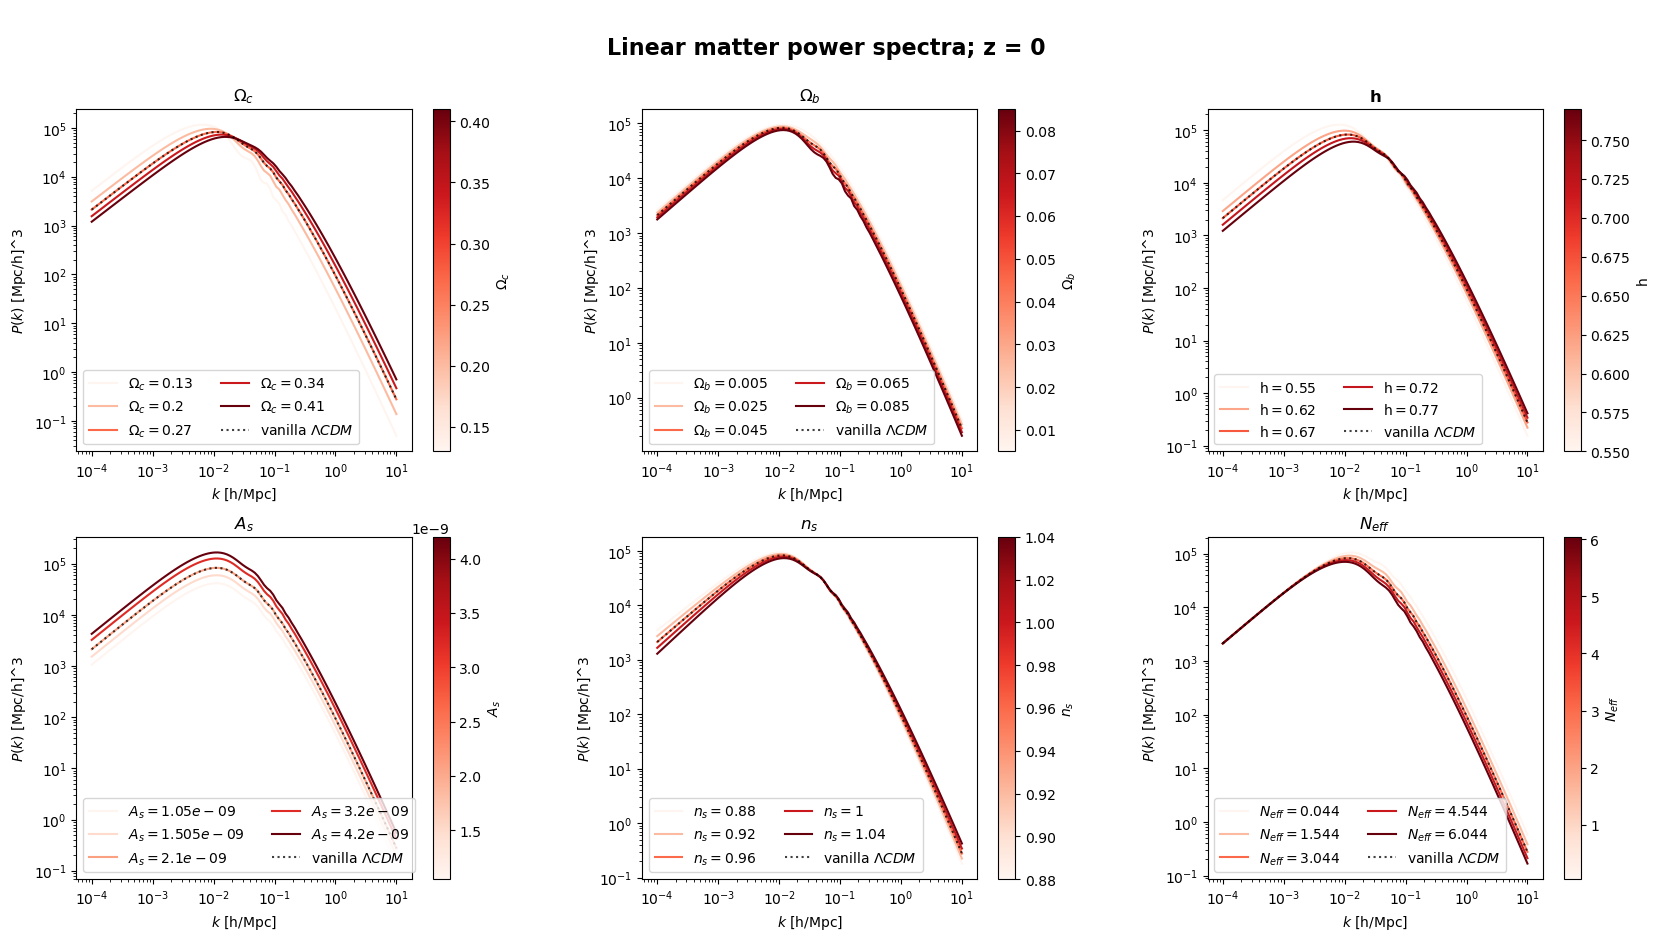

In [94]:
# Considering the found priors, we define the cosmology:
om_c_prior = [0.13, 0.20, 0.27, 0.34, 0.41] # these are random; just a trial. The deviations might be too large
om_b_prior = [0.005, 0.025, 0.045, 0.065, 0.085]
h_prior = [0.55, 0.62, 0.67, 0.72, 0.77]
a_s_prior = [1.05e-9, 1.505e-9, 2.1e-9, 3.2e-9, 4.2e-9]
n_s_prior = [0.88, 0.92, 0.96, 1, 1.04]
n_eff_prior = [0.044, 1.544, 3.044, 4.544, 6.044]

# Combine into one list of all priors, for plotting purposes:
priors = [om_c_prior, om_b_prior, h_prior, a_s_prior, n_s_prior, n_eff_prior]

# To plot the spectrum against the wavenumber:
kmin, kmax, nk = 1e-4, 1e1, 100
k = np.geomspace(kmin, kmax, nk) # np.linspace(kmin, kmax, nk) # Try linspace ---> np.geomspace() or maybe np.logspace(); geomspace makes the curve smooth
a = 1 # scale factor

# Define the linear matter power spectrum for the "vanilla LCDM" model:
cosmology = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96) # , transfer_function='boltzmann_class') # , transfer_function="eisenstein_hu")
vanilla_lcdm = ccl.linear_matter_power(cosmology, k, a)

# The standard values, in a dictionary:
pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96} # Here we have a reference list of the parameters. This will be altered slightly in the loop.
keys = list(pars)

# For elegance in our plot:
keys[0], keys[1], keys[3], keys[4] = r"$\Omega_c$", r"$\Omega_b$", r"$A_s$", r"$n_s$"
keys.append(r"$N_{eff}$")


# Since we will plot the same power spectrum for some variations, set up a loop function that returns the matter power spectrum in all variations
def loop_comso_lin(list, parameter): # "List" is an expected list of possible parameter values, "parameter": the parameter we want to vary, expected entry the the string naming the parameter
    
    # Define empty arrays in which we will put the resulting powerspectra for a certain variation.
    power_spectra_lin = [] # This is the output list we will plot from, in this array we gather all different 
    #power_spectra_nonlin  = np.zeros(len(list))
    
    # The standard values, in a dictionary:
    global pars # Here we have a reference list of the (global) parameters. This will be altered slightly in the loop.

    for i in range(len(list)): # For each value of the parameter we want to plot, we calculate a new cosmology and P(k)
        pars[parameter] = list[i]
        
        # Initiate the cosmology with the adjusted parameter, we want to plot the (linear) matter power spectrum from this. 
        cosmo_i = ccl.Cosmology(**pars) # give a dictionary of parameters, which we "unpack" using '**'

        # Calculate the (linear) matter power spectrum and add it to the list we will be returning.
        p_k_lin_i = ccl.linear_matter_power(cosmo_i, k, a)
        power_spectra_lin.append(p_k_lin_i)
        
        # Reset the parameters to their initial value
        pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96}

    return (power_spectra_lin)

# Now we generate all the variations:
var_om_c_lin = loop_comso_lin(om_c_prior, r"Omega_c")
var_om_b_lin = loop_comso_lin(om_b_prior, r"Omega_b")
var_h_lin = loop_comso_lin(h_prior, r"h")
var_a_s_lin = loop_comso_lin(a_s_prior, r"A_s")
var_n_s_lin = loop_comso_lin(n_s_prior, r"n_s")
var_n_eff = loop_comso_lin(n_eff_prior, r"Neff")

# Similar to the priors, put all the power spectra in a list:
lin_P_k = (var_om_c_lin, var_om_b_lin, var_h_lin, var_a_s_lin, var_n_s_lin, var_n_eff)

# Initiate the plot:
fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=3)
fig.suptitle("\nLinear matter power spectra; z = 0", weight="bold", fontsize=16)
plt.subplots_adjust(hspace=0.25, wspace=0.35)

# Add colormap and plot all graphs in color red, disticted by the saturation of the color
cmap = cm.get_cmap('Reds')

# Now we want to write a loop that plots all the varations to the linear power spectrum of a single parameter into a subplot.
for j in range(0, 3):
    # Define the range of the colors in the plot
    norm_row1 = mcolors.Normalize(vmin=min(priors[j]), vmax=max(priors[j]))
    norm_row2 = mcolors.Normalize(vmin=min(priors[j + 3]), vmax=max(priors[j + 3]))
    for i in range(len(priors[0])):

        # Make a ScalarMappable for the colorbar
        color_row1 = cmap(norm_row1(priors[j][i]))
        sm_row1 = cm.ScalarMappable(cmap=cmap, norm=norm_row1)
        sm_row1.set_array([])  # To avoid errors
        
        # Split the subplots per row, the first row for j = 0, 1, 2
        # First row:
        axes[0, j].loglog(k, lin_P_k[j][i], color=color_row1, label=keys[j] + r"$= {}$".format(priors[j][i]))
        
        # Add titles, labels and the legend himself
        axes[0, j].set_title(keys[j], weight="bold")
        axes[0, j].set_xlabel(r'$k$ [h/Mpc]')
        axes[0, j].set_ylabel(r'$P(k)$ [Mpc/h]^3')
        
        # Second row:
        # Set up the colors:
        color_row2 = cmap(norm_row2(priors[j + 3][i]))
        sm_row2 = cm.ScalarMappable(cmap=cmap, norm=norm_row2)
        sm_row2.set_array([])  # To avoid errors

        axes[1, j].loglog(k, lin_P_k[j + 3][i], color=color_row2, label=keys[j + 3] + r"$= {}$".format(priors[j + 3][i]))
        
        # Add titles, labels and the legend himself
        axes[1, j].set_title(keys[j + 3], weight="bold")
        axes[1, j].set_xlabel(r'$k$ [h/Mpc]')
        axes[1, j].set_ylabel(r'$P(k)$ [Mpc/h]^3')
    
    # Add colorbar to the subplots in row 1 & 2 respectively:
    cbar_row1 = fig.colorbar(sm_row1, ax=axes[0, j], label=keys[j])
    cbar_row2 = fig.colorbar(sm_row2, ax=axes[1, j], label=keys[j + 3])

    # Plot the reference value for "vanilla-LCDM":
    axes[0, j].loglog(k, vanilla_lcdm, ":", color='k', alpha=0.75, label=r"vanilla $\Lambda CDM$")
    axes[0, j].legend(loc=0, ncols=2)
    axes[1, j].loglog(k, vanilla_lcdm, ":", color='k', alpha=0.75, label=r"vanilla $\Lambda CDM$")
    axes[1, j].legend(loc=0, ncols=2)

plt.show()

In [ ]:
# Code generated by Arthur:
from matplotlib import cm
import matplotlib.colors as mcolors

omega_c_array = np.arange(0.2, 0.4, 0.02)

k = np.geomspace(1e-4, 1, 100)

pk_omega_c = []

cosmo_dict = cosmology.to_dict()

fig, ax = plt.subplots()  # Explicitly create figure and axis
# Define the color normalization and colormap
norm = mcolors.Normalize(vmin=min(omega_c_array), vmax=max(omega_c_array))
cmap = cm.get_cmap('Reds')
for om in omega_c_array:
    cosmo_dict['Omega_c'] = om
    print(om)
    cosmo_temp = ccl.Cosmology(**cosmo_dict)
    pk = ccl.linear_matter_power(cosmo_temp, k, 1.0)
    pk_omega_c.append(pk)
     # Get color from colormap
    color = cmap(norm(om))
    
    # Get color from colormap
    color = cmap(norm(om))
    
    # Plot each line with its respective color
    ax.loglog(k, pk, color=color, label=r'$\Omega_{}$ = {}'.format("c", np.round(om, 2)))

# Create a ScalarMappable for the colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Needed to avoid errors

# Add colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, label=r'$\Omega_c$')

ax.legend(loc=0, ncols=2)
ax.set_xlabel(r'$k$ [h/Mpc]')
ax.set_ylabel(r'$P(k)$ [Mpc/h]^3')
ax.set_title(r"Matter Power Spectrum for Different $\Omega_c$")
plt.show()

#print("schimmel" + "kaas") # this way there is no added space in between the merged strings. Use for "$\" + parameter + "$" in labels

{'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'A_s': 2.1e-09, 'n_s': 0.96}
Omega_c


<>:6: SyntaxWarning: invalid escape sequence '\O'
<>:6: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_2557/3117104667.py:6: SyntaxWarning: invalid escape sequence '\O'
  """ # Code generated by Arthur:


' # Code generated by Arthur:\nfrom matplotlib import cm\nimport matplotlib.colors as mcolors\n\nomega_c_array = np.arange(0.2, 0.4, 0.02)\n\nk = np.geomspace(1e-4, 1, 100)\n\npk_omega_c = []\n\ncosmo_dict = cosmology.to_dict()\n\nfig, ax = plt.subplots()  # Explicitly create figure and axis\n# Define the color normalization and colormap\nnorm = mcolors.Normalize(vmin=min(omega_c_array), vmax=max(omega_c_array))\ncmap = cm.get_cmap(\'Reds\')\nfor om in omega_c_array:\n    cosmo_dict[\'Omega_c\'] = om\n    print(om)\n    cosmo_temp = ccl.Cosmology(**cosmo_dict)\n    pk = ccl.linear_matter_power(cosmo_temp, k, 1.0)\n    pk_omega_c.append(pk)\n     # Get color from colormap\n    color = cmap(norm(om))\n    \n    # Get color from colormap\n    color = cmap(norm(om))\n    \n    # Plot each line with its respective color\n    ax.loglog(k, pk, color=color, label=r\'$\\Omega_{}$ = {}\'.format("c", np.round(om, 2)))\n\n# Create a ScalarMappable for the colorbar\nsm = cm.ScalarMappable(cmap=cmap